In [1]:
%matplotlib inline
import sys 
import numpy as np
sys.path.append("../../")
from pycircos import *
from Bio import SeqIO

In [2]:
#Read Genbank, Set locus
gbk = SeqIO.parse("../genbank_data/GCF_000005845.2_ASM584v2_genomic.gbff","genbank")
gcircle = Gcircle()
gcircle.interspace = 0.0
gcircle.read_locus(gbk, bottom=900, height=0, linewidth=0)
gcircle.set_locus()
locus_names = list(gcircle.locus_dict.keys())

In [3]:
#Visualization of gc skew by fill plot
gc_skew = gcircle.calc_gcskew('NC_000913.3', window_size=1000)
gc_skew_positive = np.copy(gc_skew) 
gc_skew_positive[gc_skew_positive<0] = 0 #Get positive value of gc skew
gc_skew_negative = np.copy(gc_skew)
gc_skew_negative[gc_skew_positive>0] = 0 #Get negative value of gc skew
gcircle.line_plot('NC_000913.3', gc_skew_positive, bottom=500, height=100, facecolor="r", linewidth=0, fill=True) #plot positive gc skew
gcircle.line_plot('NC_000913.3', -1.0 * gc_skew_negative, bottom=500, height=-100, facecolor="b", linewidth=0, fill=True) #plot negative gc skew
gcircle.set_spine('NC_000913.3', 500, linewidth=0.1) #set spine
#fig = gcircle.save()

In [4]:
#Visualization of gc ratio by barplot
gc_ratio = gcircle.calc_gcratio('NC_000913.3', window_size=1000)
gcircle.bar_plot('NC_000913.3', gc_ratio, bottom=300, height=100, facecolor="#888888")

In [5]:
#Visualization of CDS  
gcircle.plot_features('NC_000913.3', bottom=700, height=80, facecolor="#ef6f6a", requirement=lambda x:x.location.strand==1) #plot CDS on positive strand
gcircle.plot_features('NC_000913.3', bottom=620, height=80, facecolor="#6388b4", requirement=lambda x:x.location.strand==-1)#plot CDS on negative strand

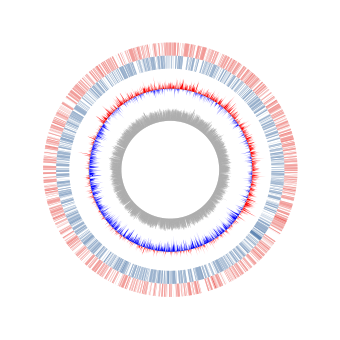

In [6]:
gcircle.save() #The process consume grate amount of times...., please take a coffee break.